OASIS INFOBYTE INTERNSHIP

**TASK:2 UNEMPLOYMENT ANALYSIS WITH PYTHON**

BY:vaishnavi jadhav  |  Email: vaishnavisj123@gmail.com

# **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Load the Dataset**

In [ ]:
data = pd.read_csv('Unemployment in India (1).csv')
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# **Data Cleaning**

In [ ]:
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
data.dropna(inplace=True)  # Remove missing values

In [ ]:
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
data.duplicated().sum()

np.int64(0)

# **Convert Date to datetime**

In [ ]:
print(data.columns.tolist())

['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [ ]:
data[' Date'] = pd.to_datetime(data[' Date'])


<ipython-input-16-536b87163594>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[' Date'] = pd.to_datetime(data[' Date'])


# **Data interpretation**

Highest Unemployment Rate State in India

In [ ]:
# Calculate the region with the highest unemployment rate
highest_unemployment_state = data.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().idxmax()
print(f"The region with the highest unemployment rate is {highest_unemployment_state}")

The region with the highest unemployment rate is Tripura


Highest Estimated Labour Participation Rate State Wise

In [ ]:
highest_participation_rate = data.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().idxmax()
print(f"The region with the highest labour participation rate is {highest_participation_rate}")

The region with the highest labour participation rate is Tripura


Lowest Unemployment Rate State in India

In [ ]:
lowest_unemployment_state = data.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().idxmin()
print(f"The region with the lowest unemployment rate is {lowest_unemployment_state}")

The region with the lowest unemployment rate is Sikkim


Highest Unemployment Rate Area in India

In [ ]:
data['Area'].value_counts().idxmax()

'Urban'

Lowest Unemployment Rate Area in India

In [ ]:
data['Area'].value_counts().idxmin()

'Rural'

# Data visualization

Time Series Plot of Unemployment Rate (Top 5 Regions)

<ipython-input-31-ed0db3f8aa3c>:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


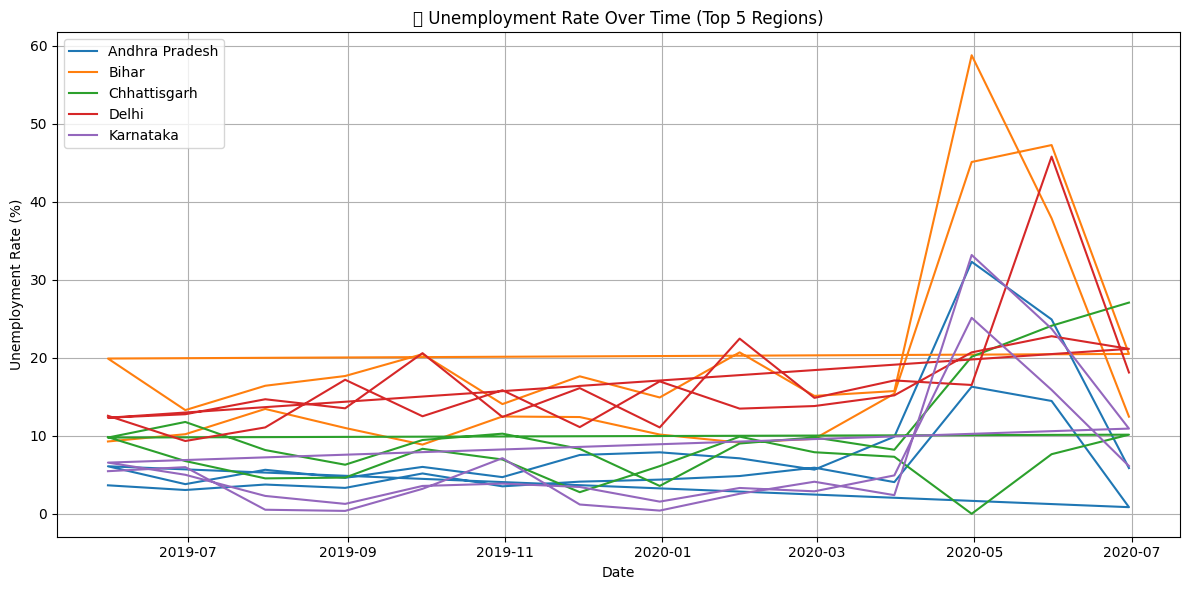

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: convert date
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Top 5 regions with most entries
top_regions = data['Region'].value_counts().head(5).index

plt.figure(figsize=(12,6))
for region in top_regions:
    subset = data[data['Region'] == region]
    plt.plot(subset['Date'], subset['Estimated Unemployment Rate (%)'], label=region)

plt.title('📈 Unemployment Rate Over Time (Top 5 Regions)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Boxplot: Unemployment Rate by Area Type (Urban vs Rural)

<ipython-input-32-bb3af355f3e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette='Set2')
<ipython-input-32-bb3af355f3e6>:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


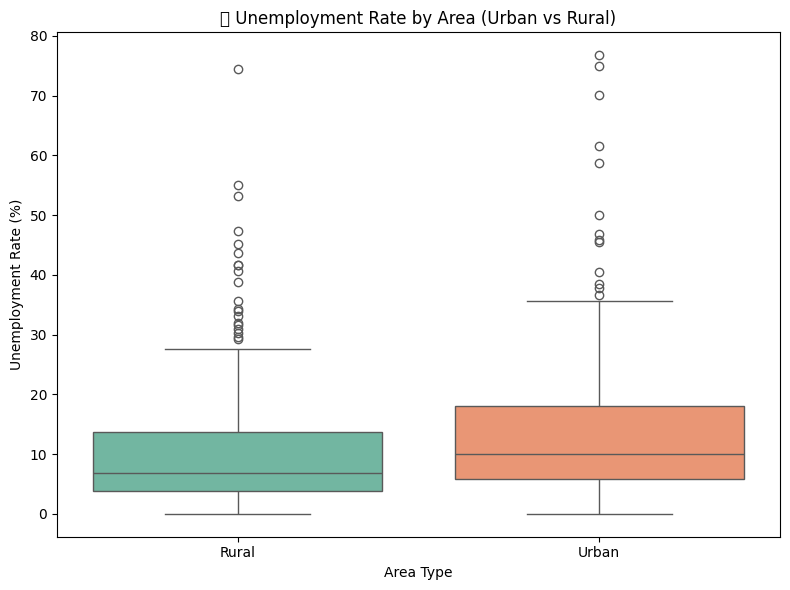

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette='Set2')

plt.title('📊 Unemployment Rate by Area (Urban vs Rural)')
plt.xlabel('Area Type')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


Date Wise Analysis

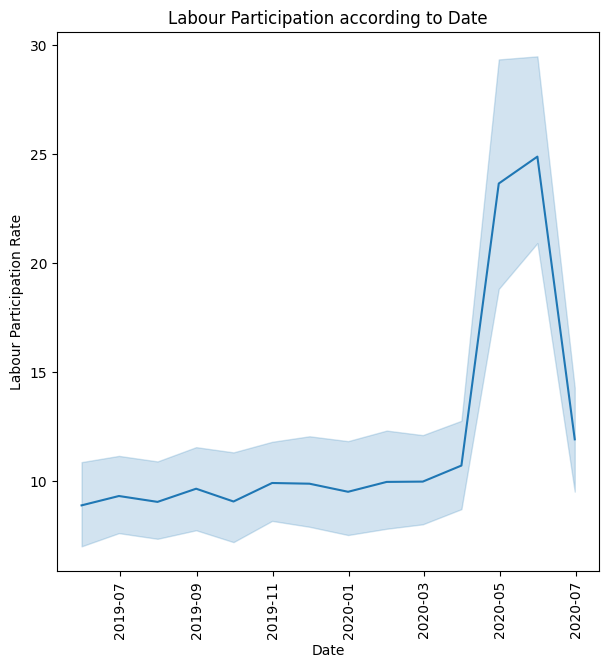

In [ ]:
fig = plt.figure(figsize = (7, 7))
sns.lineplot( y='Estimated Unemployment Rate (%)', x='Date', data=data)
plt.title('Labour Participation according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Labour Participation Rate')
plt.show()